In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
mean_age = round(df['Age'].mean())
mean_age

30

In [6]:
df2 = df.copy()
for i in range(len(df2)):
    if np.isnan(df2['Age'][i]):
        df2['Age'][i] = mean_age

C:\Users\Desmond\AppData\Local\Temp/ipykernel_12092/390067799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'][i] = mean_age


In [7]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df3 = df2.drop(['PassengerId','Name','Cabin','Embarked','Ticket'],axis=1)
df3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [9]:
df3.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [10]:
df4 = df3.copy()
map_sex = {
    'male': 0,
    'female': 1,
}
df4 = df4.replace({'Sex': map_sex})
df4['Fare'] = (df4['Fare'] - df4['Fare'].mean())/(df4['Fare'].max() - df4['Fare'].min())
df4['Age'] = (df4['Age'] - df4['Age'].mean())/(df4['Age'].max() - df4['Age'].min())
df4['Parch'] = (df4['Parch'] - df4['Parch'].mean())/(df4['Parch'].max() - df4['Parch'].min())
df4['Pclass'] = (df4['Pclass'] - df4['Pclass'].mean())/(df4['Pclass'].max() - df4['Pclass'].min())
df4.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,0.345679,0,-0.097498,1,-0.063599,-0.048707
1,1,-0.654321,1,0.103558,1,-0.063599,0.076277
2,1,0.345679,1,-0.047234,0,-0.063599,-0.047390
3,1,-0.654321,1,0.065860,1,-0.063599,0.040786
4,0,0.345679,0,0.065860,0,-0.063599,-0.047146


In [11]:
X = df4.drop(['Survived'],axis=1).values
y = df4['Survived'].values.reshape(-1,1)
X[:5], y[:5]

(array([[ 0.34567901,  0.        , -0.09749798,  1.        , -0.06359895,
         -0.04870737],
        [-0.65432099,  1.        ,  0.10355757,  1.        , -0.06359895,
          0.07627731],
        [ 0.34567901,  1.        , -0.04723409,  0.        , -0.06359895,
         -0.04738986],
        [-0.65432099,  1.        ,  0.06585965,  1.        , -0.06359895,
          0.04078587],
        [ 0.34567901,  0.        ,  0.06585965,  0.        , -0.06359895,
         -0.04714587]]),
 array([[0],
        [1],
        [1],
        [1],
        [0]], dtype=int64))

In [12]:
X = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
X[:5]

array([[ 1.        ,  0.34567901,  0.        , -0.09749798,  1.        ,
        -0.06359895, -0.04870737],
       [ 1.        , -0.65432099,  1.        ,  0.10355757,  1.        ,
        -0.06359895,  0.07627731],
       [ 1.        ,  0.34567901,  1.        , -0.04723409,  0.        ,
        -0.06359895, -0.04738986],
       [ 1.        , -0.65432099,  1.        ,  0.06585965,  1.        ,
        -0.06359895,  0.04078587],
       [ 1.        ,  0.34567901,  0.        ,  0.06585965,  0.        ,
        -0.06359895, -0.04714587]])

In [63]:
class MyLogisticRegression:
    import numpy as np
    
    def sigmoid(self,z):
        return 1/(1 + self.np.exp(-z))
    
    def tanh(self,z):
        return (self.np.exp(z) - self.np.exp(-z))/(self.np.exp(z) + self.np.exp(-z))
    
    def calculate_loss(self,y_hat,y):
        h_scale = (y_hat+1)/2
        return -(y*self.np.log(h_scale) + (1-y)*self.np.log(1-h_scale)).mean()
    
    def calculate_gradient(self,X,y_hat,y):
        return X.T.dot(y_hat-y)/y.size
    
    def predict(self,X,weights):
        return self.sigmoid(X.dot(weights))
    
    def fit(self,X,y,lr=0.0001,n_epochs=100,batch_size=32,gamma=0.9):
        weights = self.np.random.rand(X.shape[1],1)
        losses = []
        accs = []
        
        m = X.shape[0]
        v = self.np.zeros_like(weights)
        
        for _ in range(n_epochs):
            ids = self.np.random.permutation(m)
            X_shuffled = X[ids]
            y_shuffled = y[ids]
            
            for i in range(0,m,batch_size):
                Xi = X_shuffled[i:i+batch_size]
                yi = y_shuffled[i:i+batch_size]
                
                y_hat = self.predict(Xi,weights - gamma*v)
                
                loss = self.calculate_loss(y_hat,yi)
                
                grad = self.calculate_gradient(Xi,y_hat,yi)
                
                losses.append(loss)
                
                weights -= (lr*grad + gamma*v)
                
            y_pred = self.predict(X_shuffled,weights).round()
            acc = (y_pred == y_shuffled).mean()
            accs.append(acc)
        
        self.weights = weights
        self.losses = losses
        self.accs = accs

0.8051599684624181

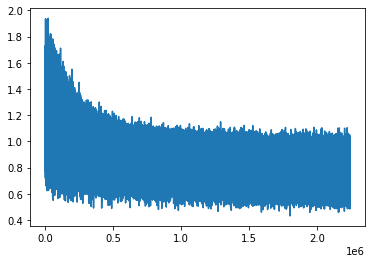

In [101]:
model = MyLogisticRegression()
model.fit(X,y,lr=0.000008,batch_size=32,n_epochs=80000)
plt.plot(model.losses)
model.losses[-1]

0.8002244668911336

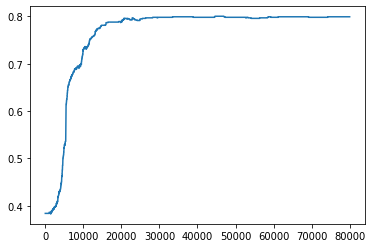

In [102]:
plt.plot(model.accs)
np.max(model.accs)

In [15]:
df_test = pd.read_csv('test.csv')
df_test = df_test.drop(['Name','Cabin','Embarked','Ticket'],axis=1)
df_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
dtype: int64

In [16]:
for i in range(len(df_test)):
    if np.isnan(df_test['Age'][i]):
        df_test['Age'][i] = round(df_test['Age'].mean())
    if np.isnan(df_test['Fare'][i]):
        df_test['Fare'][i] = round(df_test['Fare'].mean())

C:\Users\Desmond\AppData\Local\Temp/ipykernel_12092/2571279304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Age'][i] = round(df_test['Age'].mean())
C:\Users\Desmond\AppData\Local\Temp/ipykernel_12092/2571279304.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Fare'][i] = round(df_test['Fare'].mean())


In [17]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [18]:
map_sex = {
    'male': 0,
    'female': 1,
}
df_test = df_test.replace({'Sex': map_sex})
df_test['Fare'] = (df_test['Fare'] - df_test['Fare'].mean())/(df_test['Fare'].max() - df_test['Fare'].min())
df_test['Age'] = (df_test['Age'] - df_test['Age'].mean())/(df_test['Age'].max() - df_test['Age'].min())
df_test['Parch'] = (df_test['Parch'] - df_test['Parch'].mean())/(df_test['Parch'].max() - df_test['Parch'].min())
df_test['Pclass'] = (df_test['Pclass'] - df_test['Pclass'].mean())/(df_test['Pclass'].max() - df_test['Pclass'].min())

In [19]:
X_test = df_test.drop(['PassengerId'],axis=1).values
X_test[:5]

array([[ 0.36722488,  0.        ,  0.0564881 ,  0.        , -0.04359383,
        -0.0542598 ],
       [ 0.36722488,  1.        ,  0.22133051,  1.        , -0.04359383,
        -0.05587829],
       [-0.13277512,  0.        ,  0.41914141,  0.        , -0.04359383,
        -0.05063264],
       [ 0.36722488,  0.        , -0.04241734,  0.        , -0.04359383,
        -0.05263331],
       [ 0.36722488,  1.        , -0.10835431,  1.        ,  0.06751728,
        -0.04555778]])

In [20]:
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)
X_test[:5]

array([[ 1.        ,  0.36722488,  0.        ,  0.0564881 ,  0.        ,
        -0.04359383, -0.0542598 ],
       [ 1.        ,  0.36722488,  1.        ,  0.22133051,  1.        ,
        -0.04359383, -0.05587829],
       [ 1.        , -0.13277512,  0.        ,  0.41914141,  0.        ,
        -0.04359383, -0.05063264],
       [ 1.        ,  0.36722488,  0.        , -0.04241734,  0.        ,
        -0.04359383, -0.05263331],
       [ 1.        ,  0.36722488,  1.        , -0.10835431,  1.        ,
         0.06751728, -0.04555778]])

In [103]:
y_pred = model.predict(X_test,model.weights).round().reshape(418,).astype(int)
y_pred.shape

(418,)

In [22]:
ids = df_test['PassengerId'].values
ids.shape

(418,)

In [104]:
submission = pd.DataFrame({'PassengerId': ids, 'Survived': y_pred})
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [105]:
submission.to_csv('submission.csv',index=False)